In [10]:
import os
# https://developer.nvidia.com/cuda-gpus#compute
# os.environ['TORCH_CUDA_ARCH_LIST'] = '8.9'
import random
from encoder4editing.configs.paths_config import model_paths

In [11]:
# !python -m pip install -r requirements.txt

In [12]:
from encoder4editing.utils import e4e_utils
import torch
from optimization.w_optimization import Optimizer
torch.manual_seed(0)
random.seed(0)

In [13]:
%matplotlib inline

In [14]:
net = e4e_utils.load_model(model_paths['encoder_ffhq'])
generator = net.decoder
generator.eval();

Loading e4e over the pSp framework from checkpoint: encoder4editing/pretrained_models/e4e_ffhq_encode.pt


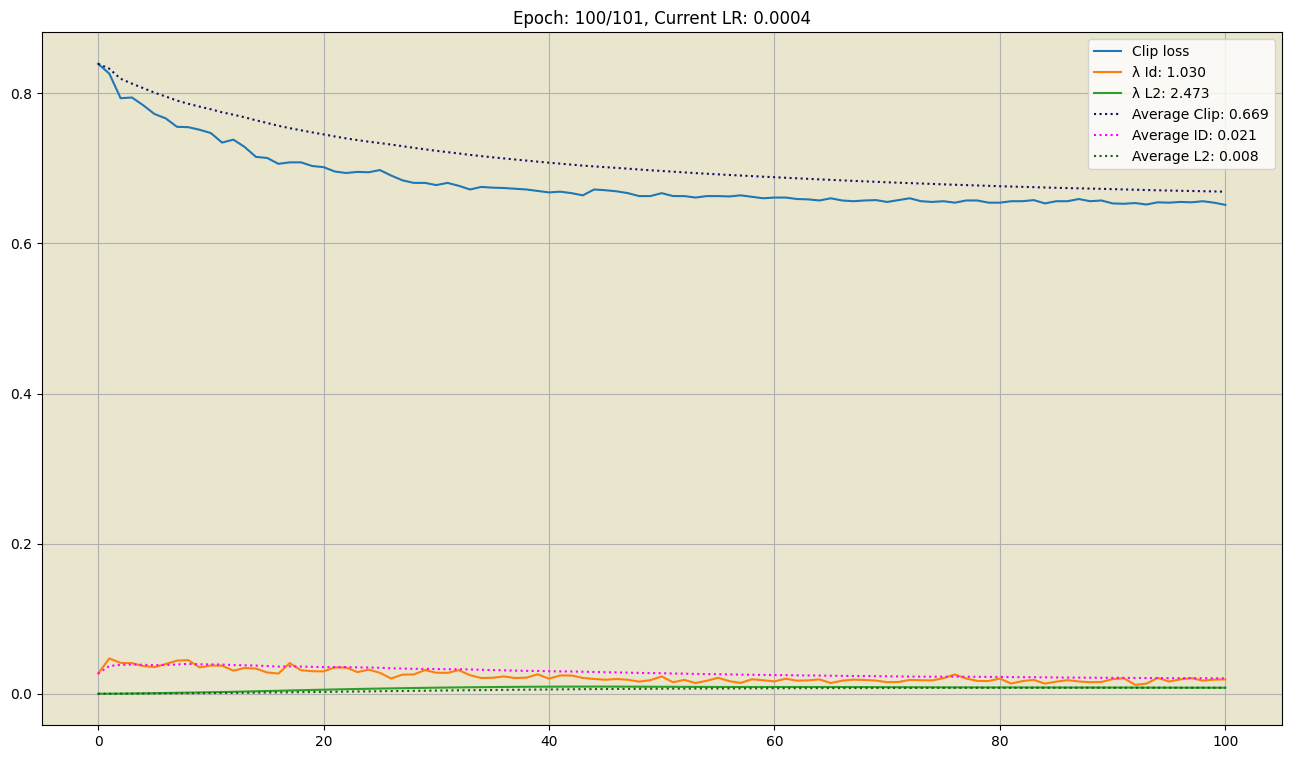

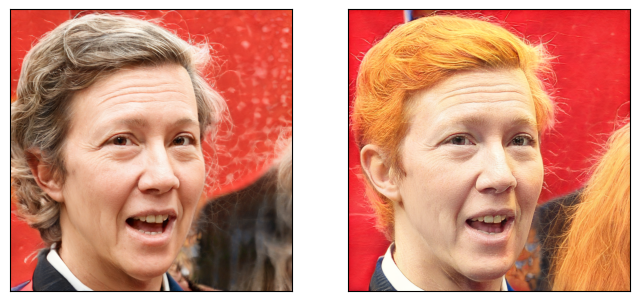

100%|██████████| 101/101 [00:10<00:00,  9.62it/s]


In [15]:
sample,latents = generator(torch.randn(2,1,512).to("cuda"),return_latents = True,truncation = 0.7)
w_optimizer = Optimizer(latents,0.8,"ginger hair" ,net.decoder)
sample,latents = generator(torch.randn(2,1,512).to("cuda"),return_latents = True,truncation = 0.7)
latents = latents.detach()
w_optimizer = Optimizer(latents,0.8,"ginger hair" ,net.decoder)
w_optimizer.fit(101,validation_interval=10,lr=1e-2,correction_factor=0.01,lambda_id=1,lambda_l2=1)   

Aligned image has shape: (256, 256)


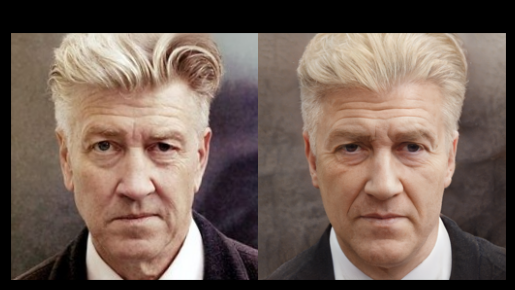

In [16]:
original,sample, latents = e4e_utils.prepare_img("images/david.jpg",net,return_original=True)

In [17]:
import gc
torch.cuda.empty_cache()
gc.collect()

41443

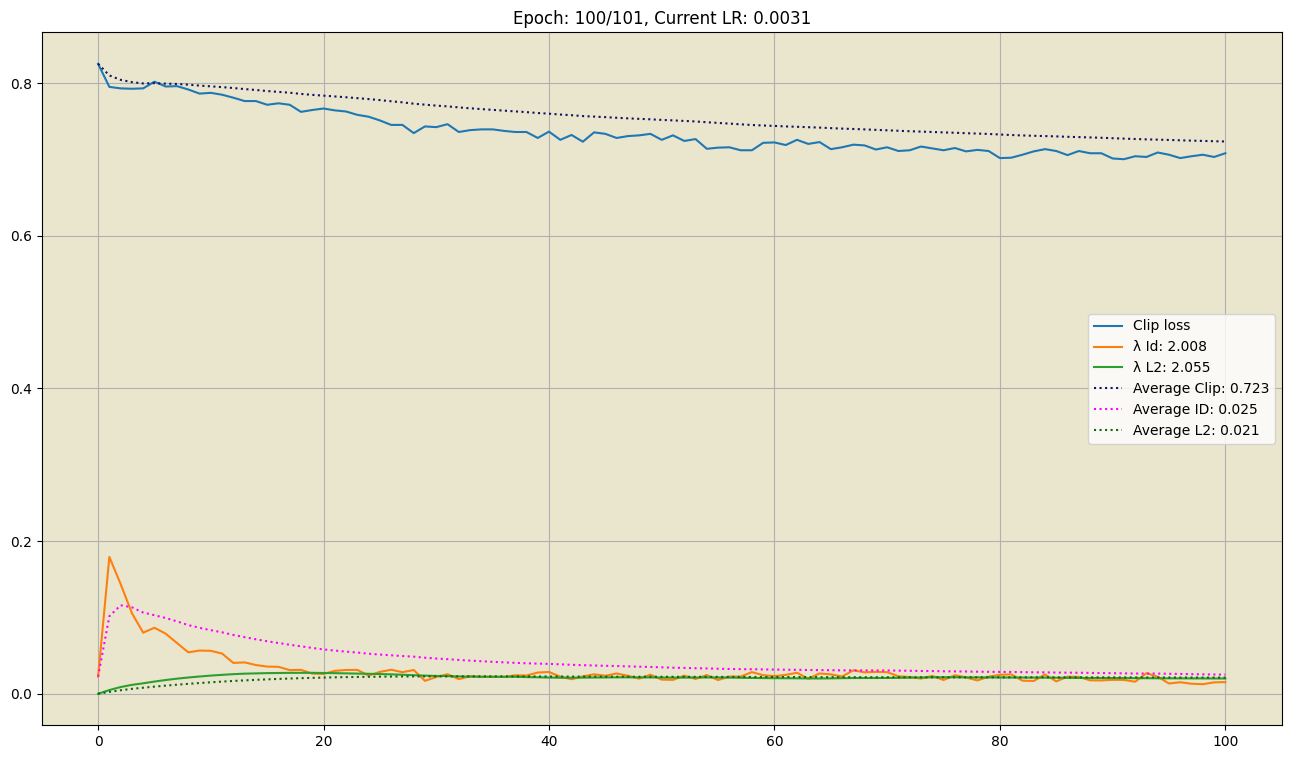

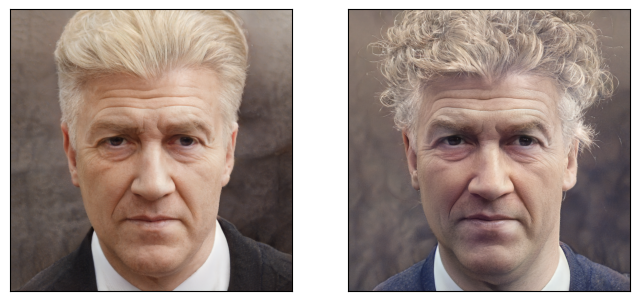

100%|██████████| 101/101 [00:07<00:00, 12.80it/s]


In [18]:

w_optimizer = Optimizer(latents,1,["curly hair"],net.decoder)
w_optimizer.fit(101,validation_interval=100)       



In [19]:
import gc
del w_optimizer
torch.cuda.empty_cache()
gc.collect()

17155